# Statistical Data Quality

In [12]:
!python3 --version

Python 3.10.0


In [1]:
import numpy as np
import matplotlib.pyplot as plt

from typing import List

## Generate Data

In [2]:
def generate_outlier_data(n: int, outliers: int) -> List[float]:
    """This method will generate a dataset with of N values including 
    user specified outliers.
    
    Args:
        n: Integer corresponding to the number of data points
        outliers: Integer representing the number of outliers to generate
    
    Returns:
        A list of N floating point numbers with outliers.
    """
    # generate a random dataset of n points
    data = np.random.normal(
        loc=0.0, 
        scale=1.0, 
        size=n
    ) 
    # add outliers
    outlier_indices = np.random.choice(
        np.arange(n), 
        size=outliers, 
        replace=False
    )
    outlier_values = np.random.normal(
        loc=5.0, 
        scale=1.0, 
        size=outliers
    )
    data[outlier_indices] = outlier_values
    return data

In [3]:
data = generate_outlier_data(n=1000, outliers=50)

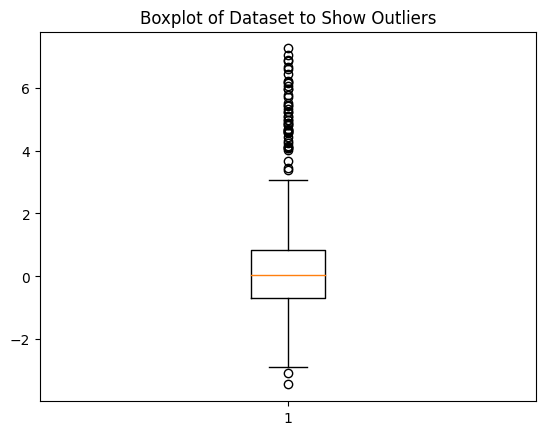

In [4]:
plt.clf()
plt.boxplot(data)
plt.title("Boxplot of Dataset to Show Outliers")
plt.show()

## IQR

In [5]:
def calculate_iqr(data: List[float], perc_range: List[int] = [25, 75], print_stats: bool = True) -> List[float]:
    """This method will calculate the IQR associated with the input dataset.
    
    Args:
        data: List of floats which holds the data you're trying to find outliers for.
        perc_range: List of floats where the left one corresponds to the first 
                    percentile and the right one corresponds to the second percentile.
        print_stats: Boolean True if you want to print the stats
        
    Returns:
        A list of outliers from the original input dataset.
    """
    # calculate the quartiles and IQR
    r1, r2 = np.percentile(data, perc_range)
    iqr = r2 - r1

    # calculate the upper and lower bounds
    upper_bound = r2 + (1.5 * iqr)
    lower_bound = r1 - (1.5 * iqr)

    # identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if print_stats:
        print("Left Percentile: ", r1)
        print("Right Percentile: ", r2)
        print("IQR: ", iqr)
        print("Upper Bound: ", upper_bound)
        print("Lower Bound: ", lower_bound)
        print("Outliers: ", outliers)
        print("Outlier Count: ", len(outliers))
    return outliers

In [6]:
calculate_iqr(
    data, 
    perc_range = [25, 75], 
    print_stats = True
)

Left Percentile:  -0.6905316398370994
Right Percentile:  0.8334849032292913
IQR:  1.5240165430663906
Upper Bound:  3.119509717828877
Lower Bound:  -2.976556454436685
Outliers:  [ 6.59241727  3.65538055  6.15215076  5.43422595  4.88500987  4.08292222
  5.70535886  5.11180453  4.98356545  5.52192098  4.0835708   4.81097497
  5.95666607  4.56074355  4.67463623  4.00774253  6.05895022  7.24274612
  6.16960954 -3.08509143  6.65706857  4.23400593  4.82393634  3.37812317
  5.77437587  6.44393216  4.30100389  7.04906011  4.41458525  4.89006126
  4.57616352  5.31075946  4.63614032  5.96171413  5.05188333  5.23898169
  5.23299197  4.64414811  4.14225987  6.86217768  6.22204199  3.45700435
 -3.43467617  4.59704552  5.42784849  6.8390414   4.65630518  4.12651787
  4.96312974]
Outlier Count:  49


array([ 6.59241727,  3.65538055,  6.15215076,  5.43422595,  4.88500987,
        4.08292222,  5.70535886,  5.11180453,  4.98356545,  5.52192098,
        4.0835708 ,  4.81097497,  5.95666607,  4.56074355,  4.67463623,
        4.00774253,  6.05895022,  7.24274612,  6.16960954, -3.08509143,
        6.65706857,  4.23400593,  4.82393634,  3.37812317,  5.77437587,
        6.44393216,  4.30100389,  7.04906011,  4.41458525,  4.89006126,
        4.57616352,  5.31075946,  4.63614032,  5.96171413,  5.05188333,
        5.23898169,  5.23299197,  4.64414811,  4.14225987,  6.86217768,
        6.22204199,  3.45700435, -3.43467617,  4.59704552,  5.42784849,
        6.8390414 ,  4.65630518,  4.12651787,  4.96312974])

## Standard Deviation

In [7]:
def calculate_sd(data: List[float], N: int, print_stats: bool = True) -> List[float]:
    """This will identify the data points in the input dataset which are not 
    within N standard deviation.
    
    Args:
        data: List of floats you want to identify outliers for
        N: Integer corresponding to the number of standard deviations
        print_stats: Boolean True if you want to print the stats
    
    Returns:
        A list of outliers from the original input dataset.
    """
    # calculate the mean and standard deviation
    mean = np.mean(data)
    std_dev = np.std(data)

    # calculate the upper and lower bounds
    upper_bound = mean + (N * std_dev)
    lower_bound = mean - (N * std_dev)

    # identify the outliers
    outliers = data[(data < lower_bound) | (data > upper_bound)]
    
    if print_stats:
        # print the results
        print("Mean: ", mean)
        print("Standard Deviation: ", std_dev)
        print("Upper Bound: ", upper_bound)
        print("Lower Bound: ", lower_bound)
        print("Outliers: ", outliers)
        print("Outlier Count: ", len(outliers))
    return outliers

In [8]:
calculate_sd(
    data, 
    N = 2, 
    print_stats = True
)

Mean:  0.24803089636527012
Standard Deviation:  1.5102899358393278
Upper Bound:  3.2686107680439256
Lower Bound:  -2.7725489753133856
Outliers:  [ 6.59241727  3.65538055  6.15215076  5.43422595  4.88500987  4.08292222
  5.70535886  5.11180453  4.98356545  5.52192098 -2.79445993  4.0835708
  4.81097497  5.95666607  4.56074355  4.67463623  4.00774253  6.05895022
  7.24274612  6.16960954 -3.08509143  6.65706857  4.23400593  4.82393634
  3.37812317  5.77437587  6.44393216  4.30100389  7.04906011  4.41458525
  4.89006126  4.57616352  5.31075946  4.63614032  5.96171413  5.05188333
  5.23898169  5.23299197  4.64414811 -2.86526138  4.14225987  6.86217768
  6.22204199  3.45700435 -3.43467617  4.59704552  5.42784849  6.8390414
  4.65630518  4.12651787  4.96312974]
Outlier Count:  51


array([ 6.59241727,  3.65538055,  6.15215076,  5.43422595,  4.88500987,
        4.08292222,  5.70535886,  5.11180453,  4.98356545,  5.52192098,
       -2.79445993,  4.0835708 ,  4.81097497,  5.95666607,  4.56074355,
        4.67463623,  4.00774253,  6.05895022,  7.24274612,  6.16960954,
       -3.08509143,  6.65706857,  4.23400593,  4.82393634,  3.37812317,
        5.77437587,  6.44393216,  4.30100389,  7.04906011,  4.41458525,
        4.89006126,  4.57616352,  5.31075946,  4.63614032,  5.96171413,
        5.05188333,  5.23898169,  5.23299197,  4.64414811, -2.86526138,
        4.14225987,  6.86217768,  6.22204199,  3.45700435, -3.43467617,
        4.59704552,  5.42784849,  6.8390414 ,  4.65630518,  4.12651787,
        4.96312974])

---